In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 데이터 쪼갤 때 필요
from sklearn.tree import DecisionTreeClassifier # 결정트리 분류!
from sklearn.tree import export_graphviz
import graphviz




#오늘도~ 화이팅!!!!#내일도~ 화이팅!!!!
#맨 마지막꺼 3개만 보면 되고 트리, 그래프 해석만 할 줄 알게


##중요 하이퍼 파라미터 각 모델별로 추가된거 잘 기억하기

# Decision Tree 
#1. min_samples_leaf, 2. min_samples_split, 3. max_depth

# Random Forest 
#1. min_samples_leaf, 2. min_samples_split, 3. max_depth + n_estimators(나무수)!!!!

# Grandient Boosting 
## 1. min_samples_leaf, 2. min_samples_split, 3. max_depth + n_estimators(나무수)! + learning_rate(학습률)!!!!



In [2]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [3]:
# 특정파일 읽어서 하라고 하면 여기에 경로 넣기!!!!!!!!!
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/IRIS.csv", engine='python',encoding='cp949')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# # 결측치 채우기 있다면
# df_raw["JOB"].fillna("Other", inplace = True)
# df_raw.fillna(df_raw.mean(), inplace = True)

In [5]:
# # object타입 변수 포함 되어 있으니까 get_dummy 해주기 !!!! 
# df_raw_dummy = pd.get_dummies(df_raw)
# df_raw_dummy.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES_setosa,SPECIES_versicolor,SPECIES_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [4]:
df_raw_y = df_raw["SPECIES"] # 목표변수 BAD // 타겟변수 맞게 컬럼명 넣으면 됨!!!!

df_raw_x = df_raw.drop("SPECIES", axis = 1, inplace = False) # 설명변수는 타겟변수 드랍하면 됩!!!!

# 트레인셋 나누기 0.7 대 0.3  임  
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


# 만약 train:validation:test=0.4:0.3:0.3 인경우 아래꺼 사용
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
#                                                                ,test_size = 0.3, random_state = 1234)

# # 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
# df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
#                                                                ,test_size = 3/7, random_state = 1234)



In [5]:

# 하이퍼 파라미터 customize하기 전임 
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeClassifier(random_state=1234)

In [6]:

print("Accuracy on traing set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on traing set:1.000
Accuracy on test set:0.978


In [32]:
# Classification도 Regression이랑 똑같은 과정으로 하이퍼파라미터 조정!!! 설명 생략함

train_accuracy = []; test_accuracy=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainAccuracy"] = train_accuracy
df_score_depth["TestAccuracy"] = test_accuracy

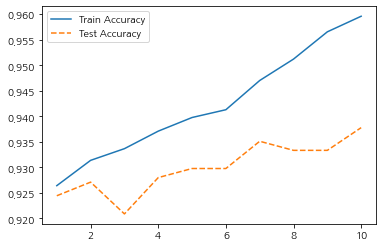

In [33]:
df_score_depth.round(3)

plt.plot(para_depth,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

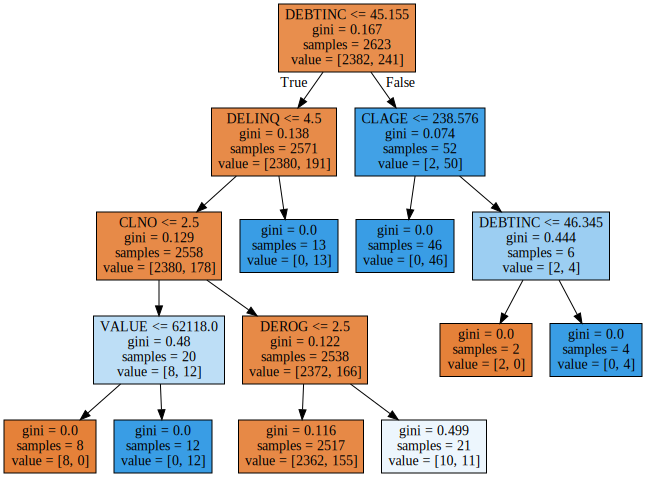

In [34]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_depth.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [35]:
train_accuracy = []; test_accuracy=[]
para_split = [s_split*10 for s_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=4,
                                 min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainAccuracy"] = train_accuracy
df_score_split["TestAccuracy"] = test_accuracy

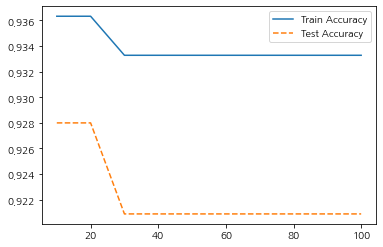

In [36]:
df_score_split.round(3)

plt.plot(para_split,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

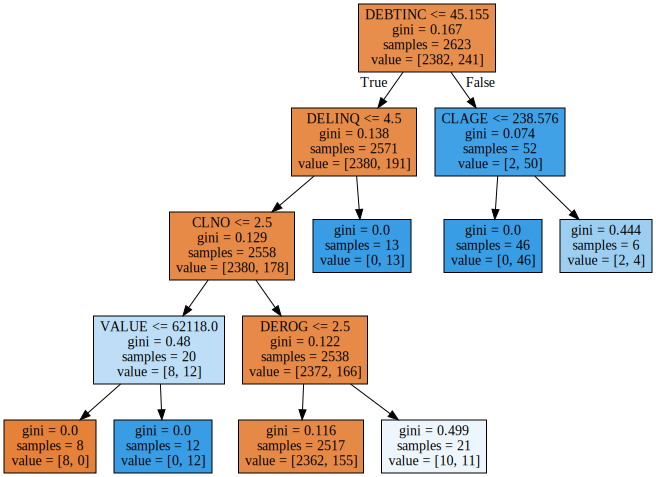

In [37]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=4, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split20.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_split20.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [38]:
train_accuracy = []; test_accuracy=[]
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=6,
                                 min_samples_split=20, min_samples_leaf=v_min_samples_leaf)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainAccuracy"] = train_accuracy
df_score_leaf["TestAccuracy"] = test_accuracy

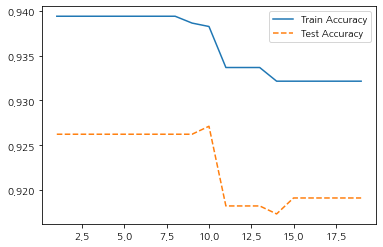

In [39]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

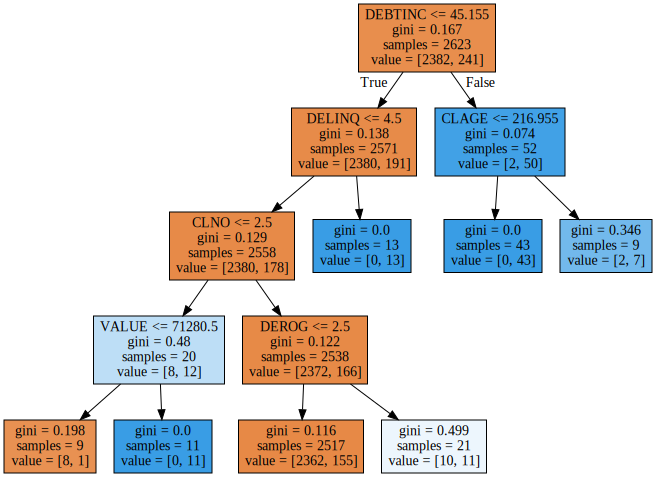

In [40]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=4, min_samples_split=20, min_samples_leaf=9)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf9.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf9.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [7]:
############# 마찬가지로 서술형에서 데이터셋이랑 하이퍼파라미터 알려주면 잘 대입해서 모델 생성하기
### 1.데이터 불러오기,2.get_dummies 3.데이터나누기, 4.Final모델 생성하기, 5. 해석하기

# # 1. 데이터 불러오기
# df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
# df_raw.head()

# # object타입 변수 포함 되어 있으면 get_dummy 해주기 !!!! 
# df_raw_dummy = pd.get_dummies(df_raw)
# df_raw_dummy.head()

###2. 데이터 나누기
# df_raw_y = df_raw["FAT"] # 목표변수 FAT // 타겟변수 맞게 컬럼명 넣으면 됨!!!!

# df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False) # 설명변수는 타겟변수 드랍하면 됩!!!!

# #3. 트레인셋 나누기 0.7 대 0.3  임  
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
#                                                                ,test_size = 0.3, random_state = 1234)


# # 만약 train:validation:test=0.4:0.3:0.3 인경우 아래꺼 사용

# # df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
# #                                                                ,test_size = 0.3, random_state = 1234)

# # # 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
# # df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
# #                                                                ,test_size = 3/7, random_state = 1234)



#4. Final모델 생성하기

tree_final = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10, max_depth=4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=1234)

In [8]:
# 생성한 Final모델 정확도 측정임
print("Accuracy on traing set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Accuracy on traing set:0.962
Accuracy on test set:0.956


In [10]:
v_feature_name = df_test_x.columns
#####4. 생성한 모델 그리고 해석하기 
# 일단 importance 구하는 거임
# 크면 중요하다 -> 하지만 노드가 나뉘어지는 순서는 아니다.!!!! (보통 중요한걸로 먼저 나눔)
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,PETAL_LENGTH,0.573
3,PETAL_WIDTH,0.427
0,SEPAL_LENGTH,0.000
1,SEPAL_WIDTH,0.000


Text(0, 0.5, '변수')

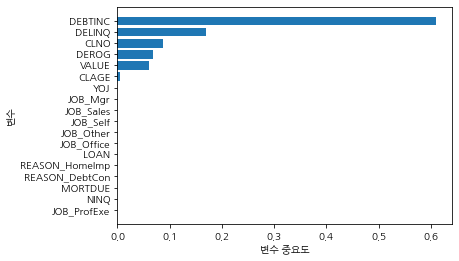

In [44]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")